In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# IBL stuff
from ibl_pipeline import behavior, acquisition 
sns.set()

Connecting anneurai@datajoint.internationalbrainlab.org:3306
Connected to https://alyx.internationalbrainlab.org as anneu


In [12]:
# take the average value per session
data1 = acquisition.Session.aggr(behavior.AmbientSensorData * behavior.Settings, 
                                 'session_start_time', 'session_lab', 'pybpod_board',
                                 temperature_c="avg(temperature_c)",
                                 air_pressure_mb='avg(air_pressure_mb)',
                                 relative_humidity='avg(relative_humidity)')
data = data1.fetch(format='frame').reset_index()
data[['temperature_c', 'air_pressure_mb', 'relative_humidity']].describe()

,temperature_c,air_pressure_mb,relative_humidity
count,17066.0,17066.0,17066.0
unique,17055.0,17055.0,17053.0
top,0.0,0.0,0.0
freq,9.0,9.0,9.0


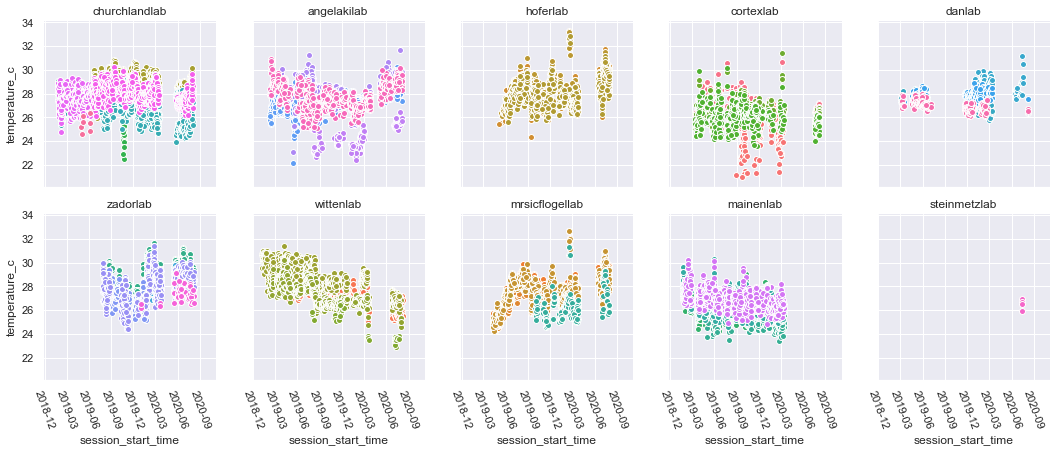

In [33]:
# order so that geographically close pairs can be easily inspected side by side
col_order = ['churchlandlab', 'angelakilab', 'hoferlab', 'cortexlab', 'danlab', 
            'zadorlab', 'wittenlab', 'mrsicflogellab', 'mainenlab', 'steinmetzlab']

g = sns.FacetGrid(data[data['temperature_c'].between(1, 50)], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "temperature_c", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)
        

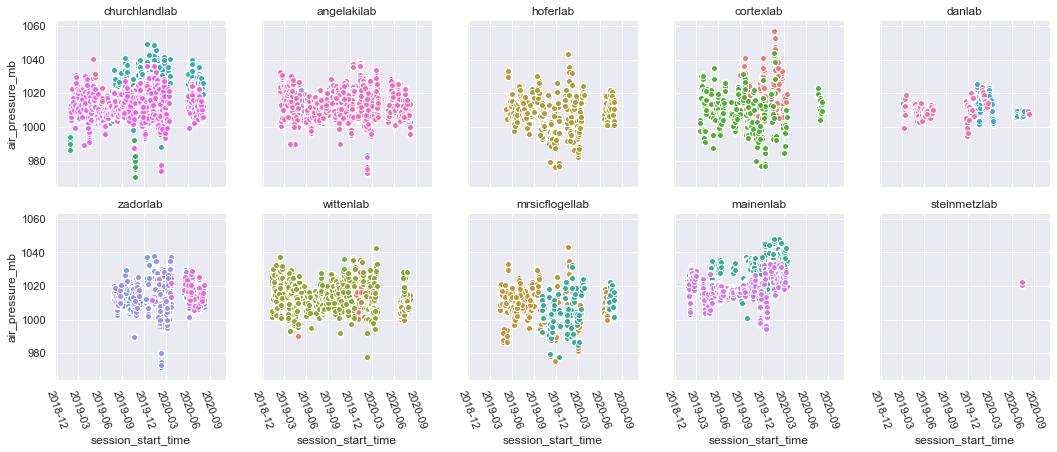

In [34]:
g = sns.FacetGrid(data[data['air_pressure_mb'].between(100, 5000)], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "air_pressure_mb", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)

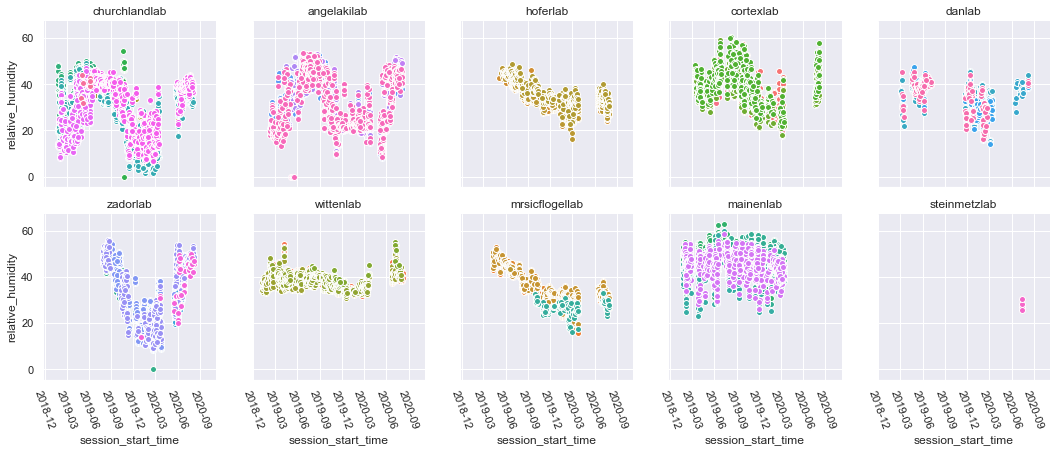

In [35]:
g = sns.FacetGrid(data[data['relative_humidity'].between(0, 100)], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "relative_humidity", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)